In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 1은 흑백 채널, 3은 컬러 채널
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 배치 단위 중 25%를 무작위로 끊어서 계산함(과대적합을 완화 목적)
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [4]:
(32*9) + 32

320

In [5]:
64*32*9 + 64

18496

In [6]:
12*12*64 

9216

In [7]:
9216*128+128

1179776

In [8]:
128*10 +10

1290

In [9]:
320 + 18496 + 1179776 + 1290

1199882

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, validation_split=0.25,
                   epochs=30, batch_size=200, callbacks=[early_stopping])

Epoch 1/30
225/225 [==============================] - 26s 111ms/step - loss: 0.2635 - accuracy: 0.9195 - val_loss: 0.0715 - val_accuracy: 0.9797
Epoch 2/30
225/225 [==============================] - 25s 110ms/step - loss: 0.0703 - accuracy: 0.9790 - val_loss: 0.0531 - val_accuracy: 0.9843
Epoch 3/30
225/225 [==============================] - 25s 110ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0511 - val_accuracy: 0.9856
Epoch 4/30
225/225 [==============================] - 25s 109ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0428 - val_accuracy: 0.9875
Epoch 5/30
225/225 [==============================] - 25s 110ms/step - loss: 0.0271 - accuracy: 0.9909 - val_loss: 0.0422 - val_accuracy: 0.9868
Epoch 6/30
225/225 [==============================] - 28s 124ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0427 - val_accuracy: 0.9886
Epoch 7/30
225/225 [==============================] - 26s 115ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0512 - val_ac

In [12]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0353 - accuracy: 0.9926
Test Accuracy: 0.9926


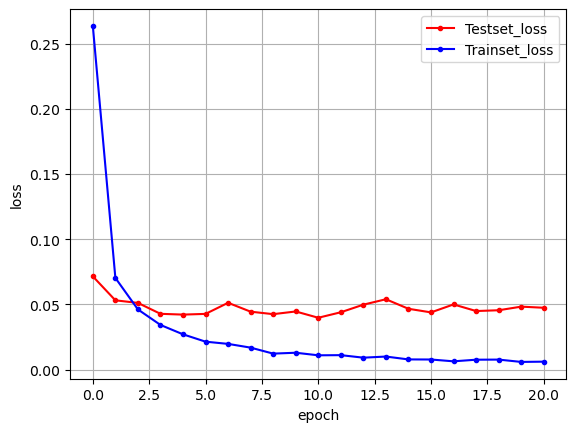

In [13]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()